# Ahmed Abd-Elsalam Muhammed Afify

In [4]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier

## Step_1:

In [5]:
df = pd.read_csv('diabetes.csv')

## Step_2:

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.drop(['Outcome'], axis=1).corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


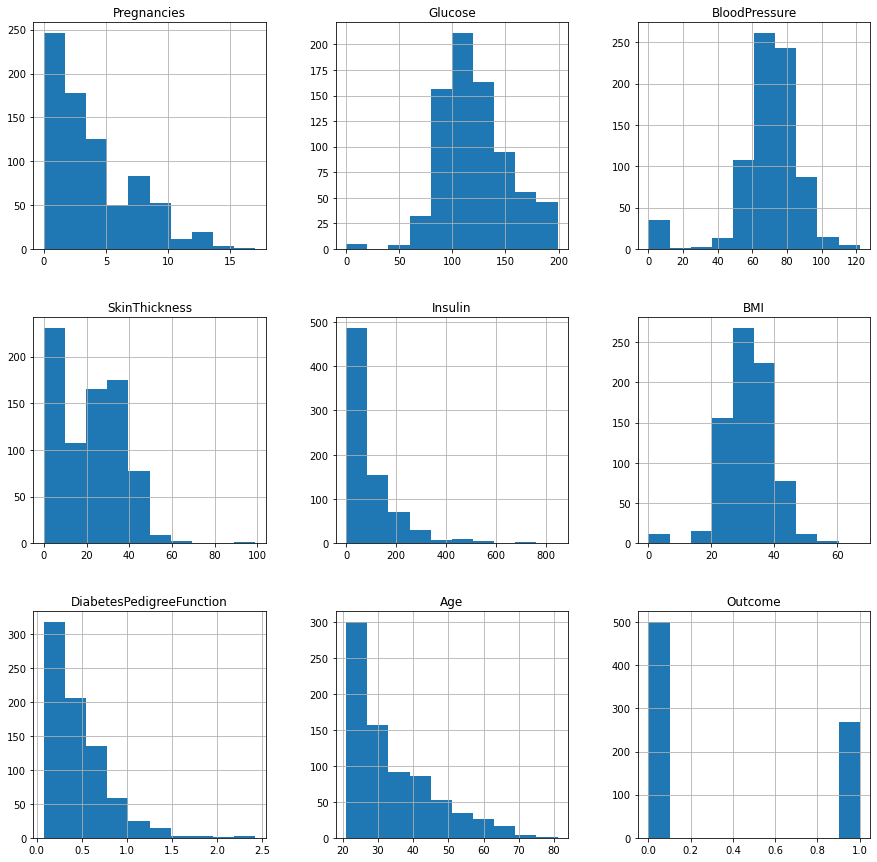

In [10]:
df.hist(figsize=(15, 15))
plt.show()

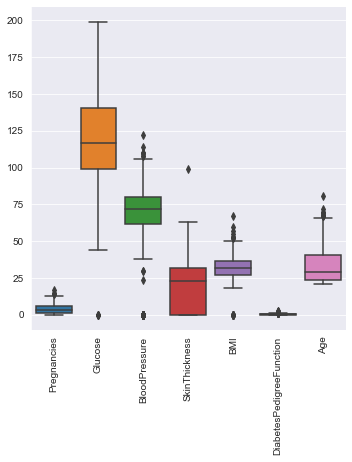

In [11]:
sns.set_style('darkgrid')
sns.catplot(data=df.drop(['Insulin', 'Outcome'], axis=1), kind='box')
plt.xticks(rotation=90)
plt.show()

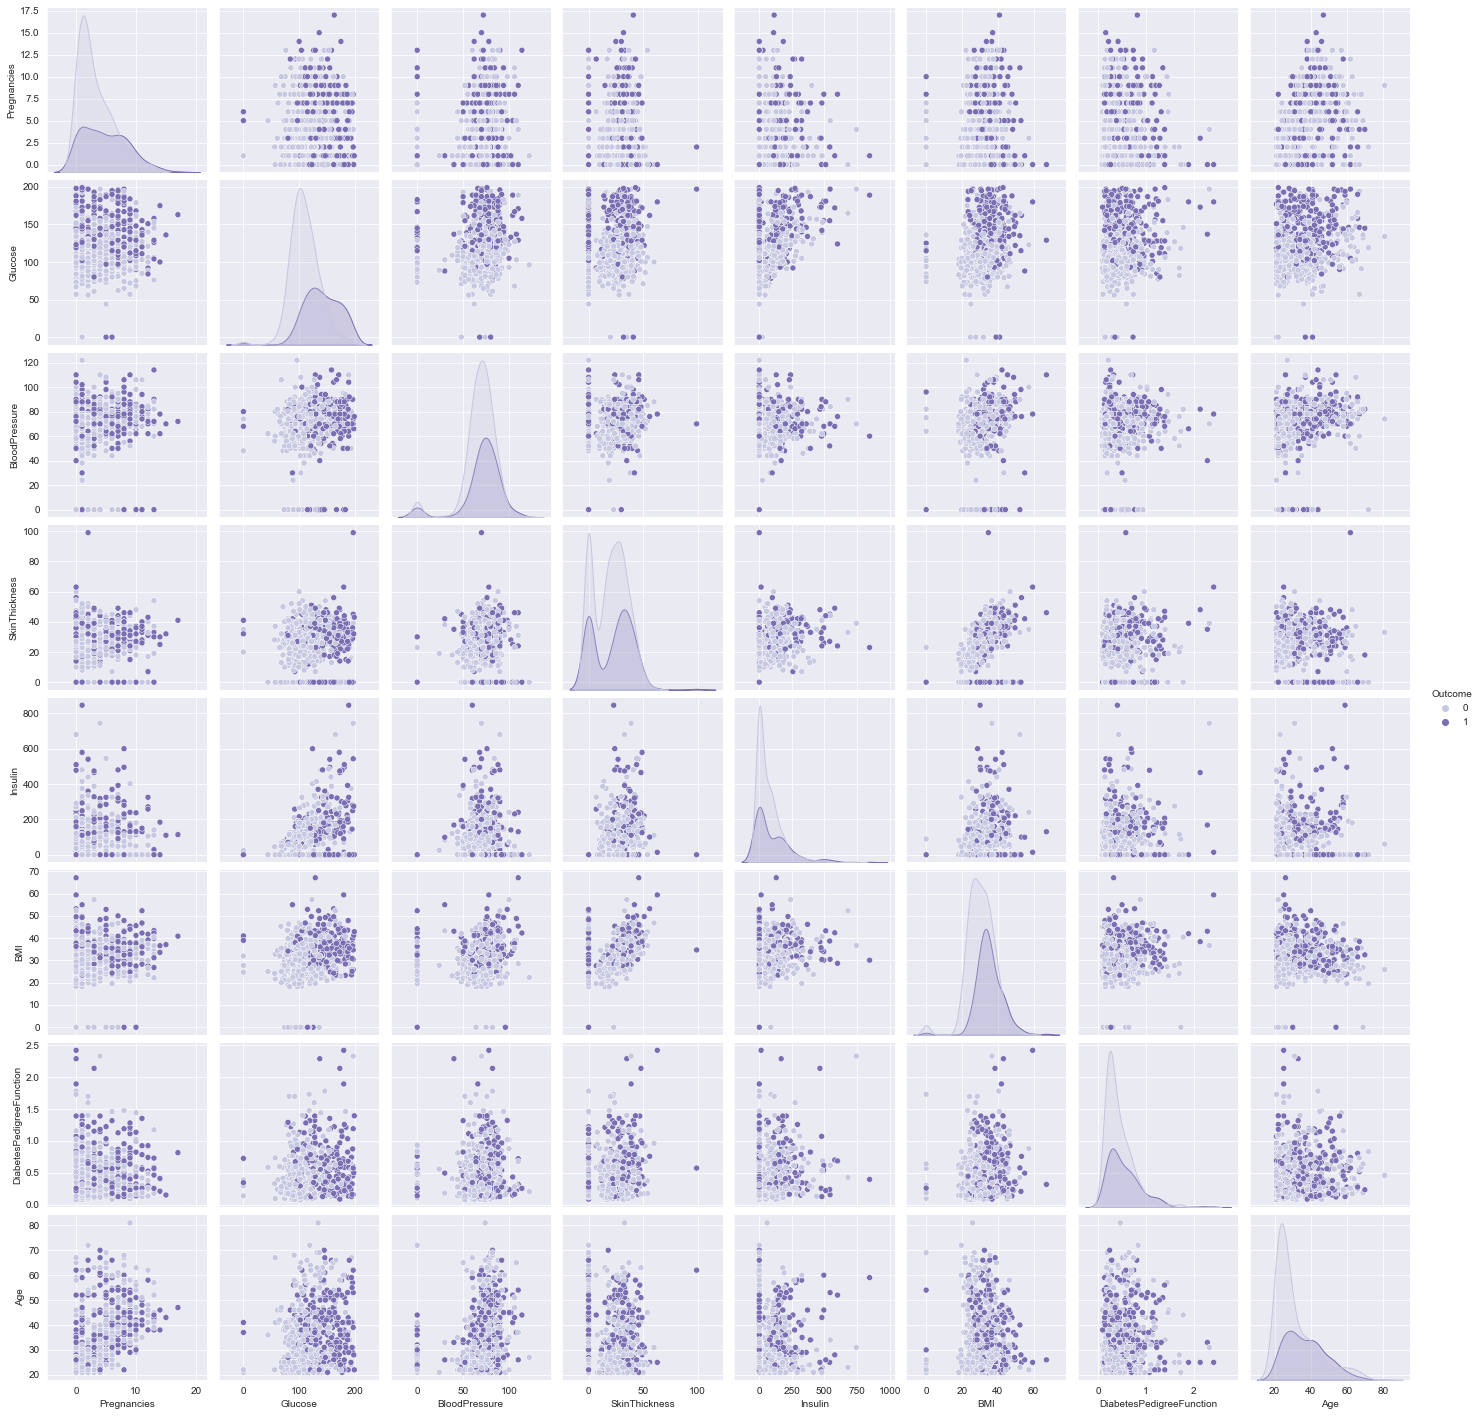

In [12]:
sns.pairplot(df, hue="Outcome",palette="Purples")
plt.show()

## Step_3:

In [13]:
# Specify data:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [15]:
# first splitting the data:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=0)

In [16]:
#K nearest nighbor
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [17]:
print(f'training set error: {knn.score(x_train, y_train)}')
print(f'test set error: {knn.score(x_valid, y_valid)}')

training set error: 0.8143322475570033
test set error: 0.7792207792207793


In [18]:
y_hat = knn.predict(x_valid)

In [19]:
from sklearn.metrics import confusion_matrix,classification_report
conf_matrix = confusion_matrix(y_valid,y_hat)
print(f'confusion_matrix: \n {conf_matrix}')

confusion_matrix: 
 [[93 14]
 [20 27]]


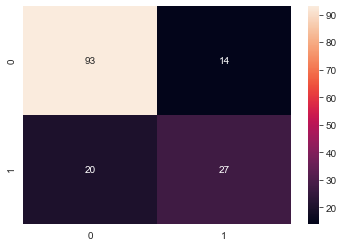

In [20]:
sns.heatmap(confusion_matrix(y_valid,y_hat), annot=True)
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.82')

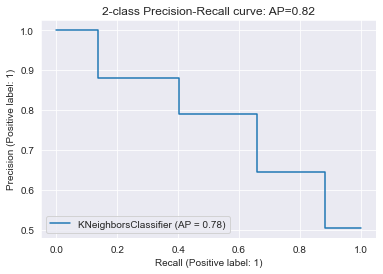

In [21]:
precision = 93/(93+20)

from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(knn, x_train, y_train)
disp.ax_.set_title('2-class Precision-Recall curve: '
                  'AP={0:0.2f}'.format(precision))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.890


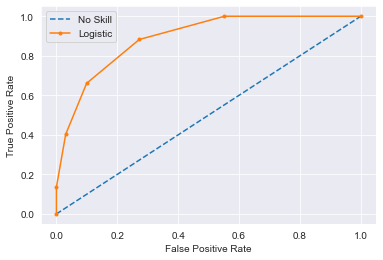

In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Using different number of n_neighbors:

In [23]:
#K nearest nighbor
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [24]:
print(f'training set error: {knn.score(x_train, y_train)}')
print(f'test set error: {knn.score(x_valid, y_valid)}')

training set error: 0.755700325732899
test set error: 0.7792207792207793


In [25]:
y_hat = knn.predict(x_valid)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
conf_matrix = confusion_matrix(y_valid,y_hat)
print(f'confusion_matrix: \n {conf_matrix}')

confusion_matrix: 
 [[97 10]
 [24 23]]


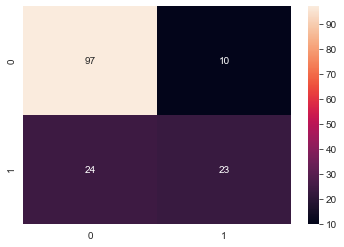

In [27]:
sns.heatmap(confusion_matrix(y_valid,y_hat), annot=True)
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.80')

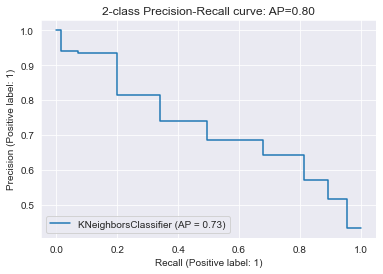

In [28]:
precision = 97/(97+24)

from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(knn, x_train, y_train)
disp.ax_.set_title('2-class Precision-Recall curve: '
                  'AP={0:0.2f}'.format(precision))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.851


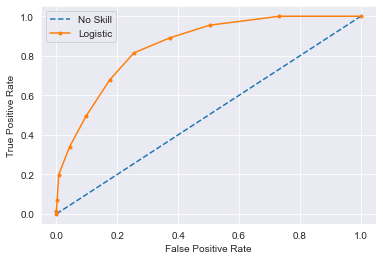

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Using different number of n_neighbors:

In [30]:
#K nearest nighbor
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [31]:
print(f'training set error: {knn.score(x_train, y_train)}')
print(f'test set error: {knn.score(x_valid, y_valid)}')

training set error: 0.758957654723127
test set error: 0.8051948051948052


In [32]:
y_hat = knn.predict(x_valid)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
conf_matrix = confusion_matrix(y_valid,y_hat)
print(f'confusion_matrix: \n {conf_matrix}')

confusion_matrix: 
 [[99  8]
 [22 25]]


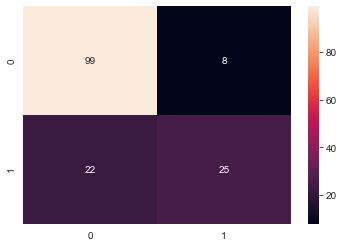

In [34]:
sns.heatmap(confusion_matrix(y_valid,y_hat), annot=True)
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.82')

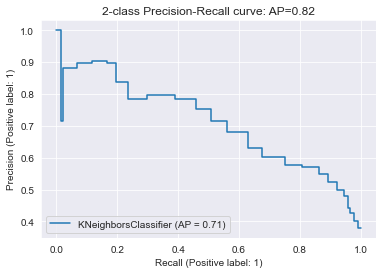

In [35]:
precision = 99/(99+22)

from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(knn, x_train, y_train)
disp.ax_.set_title('2-class Precision-Recall curve: '
                  'AP={0:0.2f}'.format(precision))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.827


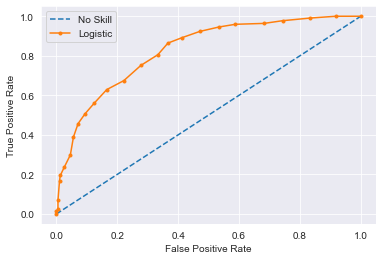

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = knn.predict_proba(x_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## KNN Implementaton:

In [37]:
class KNN():
    def __init__(self, k=5):
        self.k = k
#         self.x = x
#         self.y = y
    
    def fit(self, x_train, y_train):
        self.x = x_train
        self.y = y_train
    
    def predict(self, x_test):
        x_test.index = list(range(x_test.shape[0]))
        y_hat = np.zeros((len(x_test), 1))
        self.x.index = list(range(self.x.shape[0]))
        self.y.index = list(range(self.y.shape[0]))
        for _ in range(len(x_test)):
            distance = []
            xnn = []
            for i in range(self.k):
                dist = np.sqrt(np.sum((self.x.iloc[i, :] - x_test.iloc[_, :])**2))
                distance.append(dist)
                xnn.append(i)
        #print(distance)
        #return distance

            distance.sort()

            for i in range(self.k,len(self.x)):
                dist = np.sqrt(np.sum((self.x.iloc[i, :] - x_test.iloc[_, :])**2))

                if dist < distance[self.k-1]:
                    distance.append(dist)
                    distance.sort()
                    distance.pop()
                    index = distance.index(dist)
                    xnn[index+1:self.k-1] = xnn[index:self.k-2]
                    xnn[index] = i

            ynn = self.y.iloc[xnn]
            y_hat[_] = sum(ynn)/self.k
        return y_hat>=0.5

In [45]:
df = pd.read_csv('diabetes.csv')

In [50]:
# Specify data:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

In [51]:
# first splitting the data:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=0)

In [52]:
model = KNN()

In [53]:
model.fit(x_train, y_train)

In [54]:
predicted = model.predict(x_valid)

In [55]:
def find_TP(y, y_hat):
   # counts the number of true positives (y = 1, y_hat = 1)
   return sum((y == 1) & (y_hat == 1))
def find_FN(y, y_hat):
   # counts the number of false negatives (y = 1, y_hat = 0) Type-II error
   return sum((y == 1) & (y_hat == 0))
def find_FP(y, y_hat):
   # counts the number of false positives (y = 0, y_hat = 1) Type-I error
   return sum((y == 0) & (y_hat == 1))
def find_TN(y, y_hat):
   # counts the number of true negatives (y = 0, y_hat = 0)
   return sum((y == 0) & (y_hat == 0))

In [66]:
y_valid = y_valid.to_numpy().reshape(-1,1)
TP = find_TP(y_valid, predicted)
FN = find_FN(y_valid, predicted)
FP = find_FP(y_valid, predicted)
TN = find_TN(y_valid, predicted)
print('TP:',TP)
print('FN:',FN)
print('FP:',FP)
print('TN:',TN)
precision = TP/(TP+FP)
print('Precision:',precision)

TP: [29]
FN: [18]
FP: [16]
TN: [91]
Precision: [0.64444444]


In [78]:
confusion_matrix = np.array([[TP[0], FN[0]], [FP[0], TN[0]]])
confusion_matrix

array([[29, 18],
       [16, 91]])

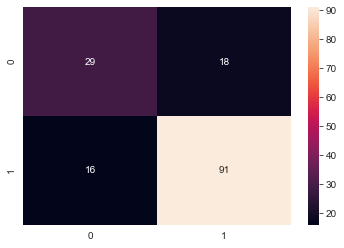

In [79]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()